### This project intends to apply an algorithm for finding an "hamiltonian path"

"In the mathematical field of graph theory, a Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex <u>exactly once.</u>"

https://en.wikipedia.org/wiki/Hamiltonian_path#:~:text=In%20the%20mathematical%20field%20of,path%20that%20is%20a%20cycle.

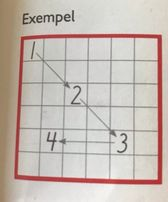

In [13]:
from IPython.display import Image
Image(filename='hamiltonianChallenge.jpg') 

### "Mattekluring i E:s mattebok. Man ska fylla i siffror i en följd i rutsystemet. Antingen får man hoppa över en ruta diagonalt eller två rutor höger eller vänster eller upp och ner. Hur vi än gör kommer vi till 30. Går det att komma längre?" - H

In [14]:
import numpy as np
from IPython.display import HTML, display
from functools import reduce 
from operator import mul
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
def flatten(t):
    return [item for sublist in t for item in sublist]

In [15]:
#Stolen here: https://stackoverflow.com/questions/47982604/hamiltonian-path-using-python

def hamilton(G,size,pt,path=[]):
    print(f'hamilton called with pt={pt}, path={path}')
    if pt not in set(path):
        path.append(pt)
        if len(path)==size:
            return path
        for pt_next in G.get(pt,[]):
            res_path=[i for i in path]
            candidate = hamilton(G,size,pt_next,res_path)
            if candidate is not None: # skip loop or dead end
                return candidate
        print(f'path {path} is a dead end')
    else:
        print(f'pt {pt} already in path {path}')

In [16]:
G = {1:[2,3,4],2:[1,3,4],3:[1,2,4],4:[1,2,3]}
graphTablePOC=hamilton(G,4,1)

hamilton called with pt=1, path=[]
hamilton called with pt=2, path=[1]
hamilton called with pt=1, path=[1, 2]
pt 1 already in path [1, 2]
hamilton called with pt=3, path=[1, 2]
hamilton called with pt=1, path=[1, 2, 3]
pt 1 already in path [1, 2, 3]
hamilton called with pt=2, path=[1, 2, 3]
pt 2 already in path [1, 2, 3]
hamilton called with pt=4, path=[1, 2, 3]


In [17]:
graphTablePOC

[1, 2, 3, 4]

In [22]:
# graphTable=G
# graphTableForGraph=graphTablePOC
def printNiceGraph(graphTable,graphTableForGraph):
    toList=flatten([graphTable[i+1] for i in range(len(graphTable))])
    fromList=flatten([[i+1]*len(graphTable[i+1]) for i in range(len(graphTable))])
    pathFromList=graphTableForGraph[:-1]
    pathToList=graphTableForGraph[1:]
    
    df = pd.DataFrame({ 'from':fromList, 'to':toList})
    df_red = pd.DataFrame({ 'from':pathFromList, 'to':pathToList})
    # Build your graph
    GForPlot=nx.from_pandas_edgelist(df, 'from', 'to')
    nx.set_edge_attributes(GForPlot,'b','color')
    # Chart with Custom edges:
    # GForPlot = nx.Graph()
    GForPlot.add_path(graphTableForGraph,color='r')
    plt.figure(1,figsize=(12,12))
    # colors = nx.get_edge_attributes(GForPlot,'color').values()
    colors = nx.get_edge_attributes(GForPlot,'color').values()
    nx.draw(GForPlot, with_labels=True, width=3,edge_color=colors, style="solid", node_size=1000,w=5000)
    # nx.draw(df_red, with_labels=True, width=3, edge_color="red", style="solid", node_size=1000,w=5000)


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


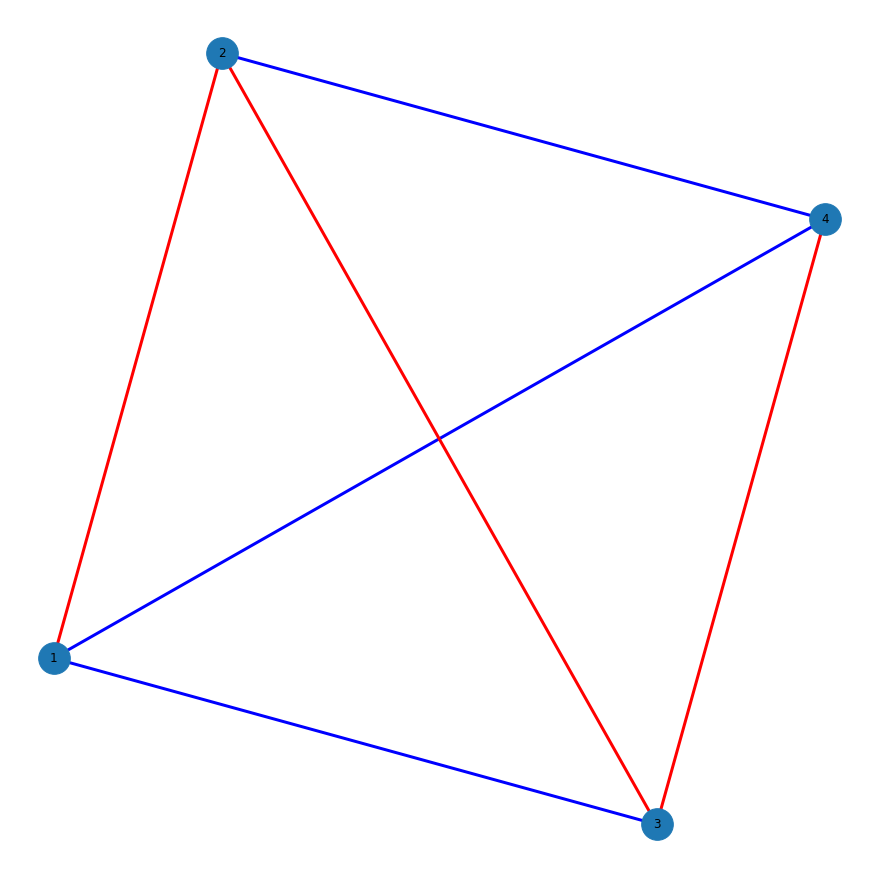

In [23]:
printNiceGraph(G,graphTablePOC)

In [24]:
def hamilton(G,size,pt,path=[]):
    #print(f'hamilton called with pt={pt}, path={path}')
    if pt not in set(path):
        path.append(pt)
        if len(path)==size:
            return path
        for pt_next in G.get(pt,[]):
            res_path=[i for i in path]
            candidate = hamilton(G,size,pt_next,res_path)
            if candidate is not None: # skip loop or dead end
                return candidate
        if len(path)==35:
            print(f'path {path} is a dead end with length of {len(path)}')
    #else:
    #    print(f'pt {pt} already in path {path}')


G={1:[15,4,19],2:[16,5,20],3:[17,13,6,21],4:[18,14,1,22],5:[15,2,23],6:[16,3,24],7:[21,10,25],8:[22,11,26],9:[23,19,12,27],10:[24,20,7,28],11:[21,8,29],12:[22,9,30],13:[27,3,16,31],14:[28,4,17,32],15:[29,5,1,25,18,33],16:[30,6,2,26,13,34],17:[3,27,14,35],18:[4,28,15,36],19:[33,9,22,1,],20:[34,10,23,2,],21:[35,11,7,31,24,3,],22:[36,12,8,32,19,4,],23:[9,33,20,5,],24:[10,34,21,6],25:[15,28,7,],26:[16,29,8,],27:[17,13,30,9,],28:[18,14,25,10,],29:[15,26,11,],30:[16,27,12],31:[21,34,13,],32:[22,35,14,],33:[23,19,36,15,],34:[24,20,31,16,],35:[21,32,17,],36:[22,33,18]}
graphTable=hamilton(G,36,8)

path [8, 22, 36, 33, 23, 9, 19, 1, 15, 5, 2, 16, 30, 27, 17, 35, 32, 14, 4, 18, 28, 25, 7, 10, 20, 34, 24, 6, 3, 13, 31, 21, 11, 29, 26] is a dead end with length of 35
path [8, 22, 36, 33, 23, 9, 19, 1, 15, 5, 2, 16, 30, 27, 17, 35, 32, 14, 4, 18, 28, 25, 7, 10, 20, 34, 31, 13, 3, 6, 24, 21, 11, 29, 26] is a dead end with length of 35
path [8, 22, 36, 33, 23, 9, 19, 1, 15, 5, 2, 16, 30, 27, 13, 31, 34, 20, 10, 24, 6, 3, 17, 35, 32, 14, 4, 18, 28, 25, 7, 21, 11, 29, 26] is a dead end with length of 35
path [8, 22, 36, 33, 23, 9, 19, 1, 15, 5, 2, 16, 30, 27, 13, 31, 34, 20, 10, 7, 25, 28, 18, 4, 14, 32, 35, 17, 3, 6, 24, 21, 11, 29, 26] is a dead end with length of 35


In [25]:
print("The interpretation of the grid below is that the first location is the first stop on the path, the second entry is the second stop, etc..")

# Stolen here: https://stackoverflow.com/questions/56121903/how-to-reshape-python-list-without-numpy
def reshape(lst, shape):
    if len(shape) == 1:
        return lst
    n = reduce(mul, shape[1:])
    return [reshape(lst[i*n:(i+1)*n], shape[1:]) for i in range(len(lst)//n)]

graphTableReshaped=reshape(graphTable, [6,6])

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in graphTableReshaped)
       )
))

The interpretation of the grid below is that the first location is the first stop on the path, the second entry is the second stop, etc..


8,22,36,33,23,9
19,1,15,5,2,16
26,29,11,21,7,25
28,18,4,14,32,35
17,3,6,24,10,20
34,31,13,27,30,12


In [26]:
outputTable=np.zeros(36)
n=int(1)
for val in graphTable:
    outputTable[val-1]=n
    n+=1

outputTableReshaped_likeExample=np.reshape(outputTable,(6,6))

print("The interpretation of the grid below is the same as in the example in the very top of the document")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(int(_)) for _ in row)) for row in outputTableReshaped_likeExample)
       )
))

The interpretation of the grid below is the same as in the example in the very top of the document


8,11,26,21,10,27
17,1,6,29,15,36
33,22,9,12,25,20
7,30,16,2,5,28
18,13,34,19,14,35
32,23,4,31,24,3


The path taken is noted in red; The unused (but possible paths) are in blue. Note that every node is visited exactly once.


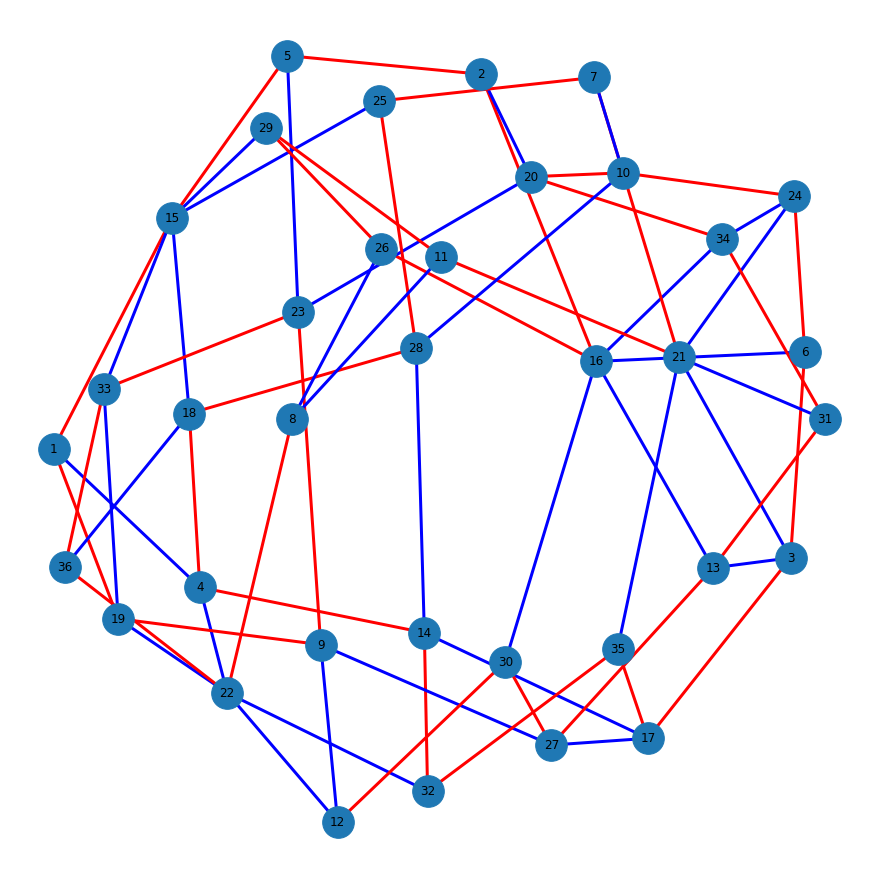

In [34]:
printNiceGraph(G,graphTable)
print("The path taken is noted in red; The unused (but possible paths) are in blue. Note that every node is visited exactly once.")